<a href="https://colab.research.google.com/github/papichoolo/Soybeans/blob/main/SoyNet_Beans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting the dataset from Google Drive and importing libraries

In [4]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/Camera Clicks_256_256')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['Disease_Preprocessing data', 'Healthy_Preprocessing data']
Types of classes labels found:  2


In [5]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/content/drive/MyDrive/Camera Clicks_256_256' + '/' +item)
 print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

['Soy (1060).JPG', 'Soy (106).JPG', 'Soy (1061).JPG', 'Soy (1062).JPG', 'Soy (1064).JPG', 'Soy (1063).JPG', 'Soy (1066).JPG', 'Soy (1065).JPG', 'Soy (1068).JPG', 'Soy (1067).JPG', 'Soy (1069).JPG', 'Soy (1070).JPG', 'Soy (1071).JPG', 'Soy (1072).JPG', 'Soy (1074).JPG', 'Soy (1073).JPG', 'Soy (1075).JPG', 'Soy (1076).JPG', 'Soy (1078).JPG', 'Soy (1077).JPG', 'Soy (1080).JPG', 'Soy (1079).JPG', 'Soy (1082).JPG', 'Soy (1081).JPG', 'Soy (1083).JPG', 'Soy (1084).JPG', 'Soy (1085).JPG', 'Soy (1086).JPG', 'Soy (1087).JPG', 'Soy (1088).JPG', 'Soy (1089).JPG', 'Soy (109).JPG', 'Soy (1090).JPG', 'Soy (1092).JPG', 'Soy (1091).JPG', 'Soy (1094).JPG', 'Soy (1093).JPG', 'Soy (1095).JPG', 'Soy (1096).JPG', 'Soy (1097).JPG', 'Soy (1098).JPG', 'Soy (1099).JPG', 'Soy (110).JPG', 'Soy (11).JPG', 'Soy (1101).JPG', 'Soy (1100).JPG', 'Soy (1102).JPG', 'Soy (1104).JPG', 'Soy (1105).JPG', 'Soy (1106).JPG', 'Soy (1107).JPG', 'Soy (1108).JPG', 'Soy (1109).JPG', 'Soy (111).JPG', 'Soy (1110).JPG', 'Soy (1111).JPG

Creating a dataframe of Images and labels

In [6]:
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

                       Labels  \
0  Disease_Preprocessing data   
1  Disease_Preprocessing data   
2  Disease_Preprocessing data   
3  Disease_Preprocessing data   
4  Disease_Preprocessing data   

                                               image  
0  dataset_path/Disease_Preprocessing data/Soy (1...  
1  dataset_path/Disease_Preprocessing data/Soy (1...  
2  dataset_path/Disease_Preprocessing data/Soy (1...  
3  dataset_path/Disease_Preprocessing data/Soy (1...  
4  dataset_path/Disease_Preprocessing data/Soy (1...  
                          Labels  \
1189  Healthy_Preprocessing data   
1190  Healthy_Preprocessing data   
1191  Healthy_Preprocessing data   
1192  Healthy_Preprocessing data   
1193  Healthy_Preprocessing data   

                                                  image  
1189  dataset_path/Healthy_Preprocessing data/Soy (9...  
1190  dataset_path/Healthy_Preprocessing data/Soy (7...  
1191  dataset_path/Healthy_Preprocessing data/Soy (9...  
1192  dataset_path/Hea

In [7]:
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1194
Disease_Preprocessing data    1055
Healthy_Preprocessing data     139
Name: Labels, dtype: int64


Reading the Image and Resizing it to 224 x 224

In [8]:
import cv2
path = '/content/drive/MyDrive/Camera Clicks_256_256/'
dataset_path = os.listdir('/content/drive/MyDrive/Camera Clicks_256_256')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [9]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(1194, 224, 224, 3)

Encoding labels

In [10]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Disease_Preprocessing data' 'Disease_Preprocessing data'
 'Disease_Preprocessing data' ... 'Healthy_Preprocessing data'
 'Healthy_Preprocessing data' 'Healthy_Preprocessing data']
[0 0 0 ... 1 1 1]


In [11]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [12]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1134, 224, 224, 3)
(1134, 2)
(60, 224, 224, 3)
(60, 2)


Using EfficientNetB0

In [13]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [14]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy","F1Score","Precision","Recall"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=5, verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 2)                 4052133   
 )                                                               
                                                                 
Total params: 4052133 (15.46 MB)
Trainable params: 4010110 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
Epoch 1/5
36/36 - 58s - loss: 1.1680 - accuracy: 0.7646 - f1_score: 0.5414 - precision: 0.7646 - recall: 0.7646 - 58s/epoch - 2s/step
Epoch 2/5
36/36 - 10s - loss: 0.4384 - accuracy: 0.8651 - f1_score: 0.6226 - precision: 0.8651 - recall: 0.8651 - 10s/epoch - 268ms/step
Epoch 3/5
36/36 - 10s - loss: 0.3416 - accuracy: 0.8907 - f1_score: 0.6953 -

In [15]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2/2 [==============================] - 4s 901ms/step - loss: 0.4594 - accuracy: 0.8500 - f1_score: 0.4595 - precision: 0.8500 - recall: 0.8500
Loss = 0.45935899019241333
Test Accuracy = 0.8500000238418579


In [16]:
hist.history["precision"]

[0.7645502686500549,
 0.8650793433189392,
 0.8906525373458862,
 0.89241623878479,
 0.9038800597190857]

In [17]:
hist.history["recall"]


[0.7645502686500549,
 0.8650793433189392,
 0.8906525373458862,
 0.89241623878479,
 0.9038800597190857]

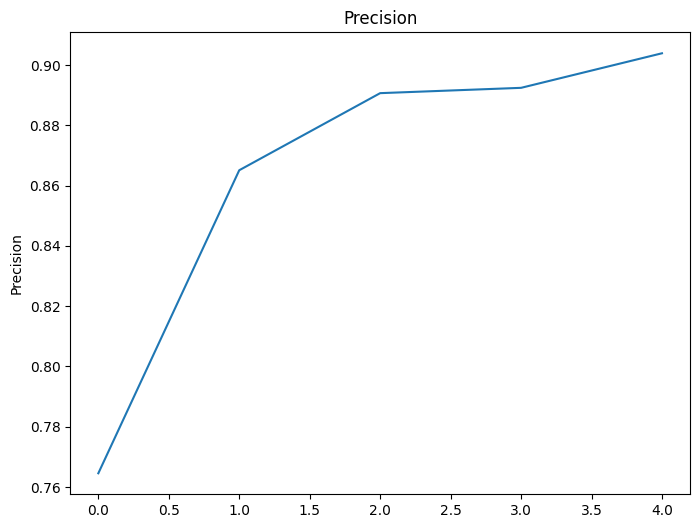

In [18]:
# Plot the F1 score
plt.figure(figsize=(8, 6))
plt.plot(hist.history["precision"])
plt.title('Precision')
plt.ylabel('Precision')


plt.show()

Text(0, 0.5, 'Recall')

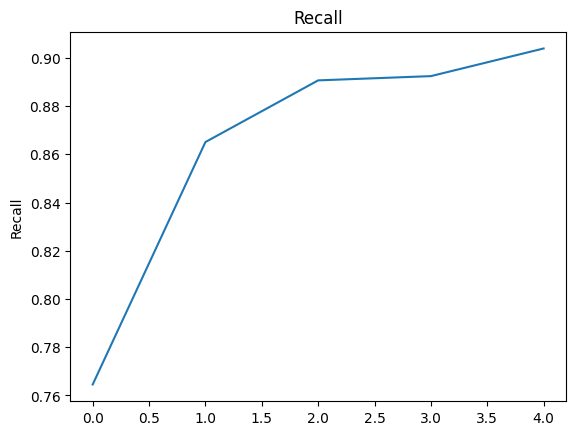

In [19]:
plt.plot(hist.history["recall"])
plt.title('Recall')
plt.ylabel('Recall')

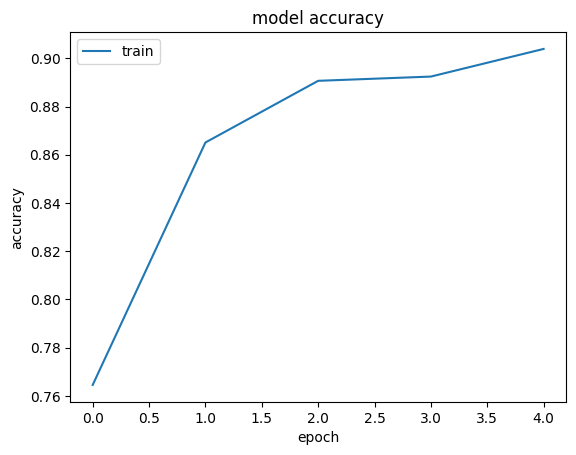

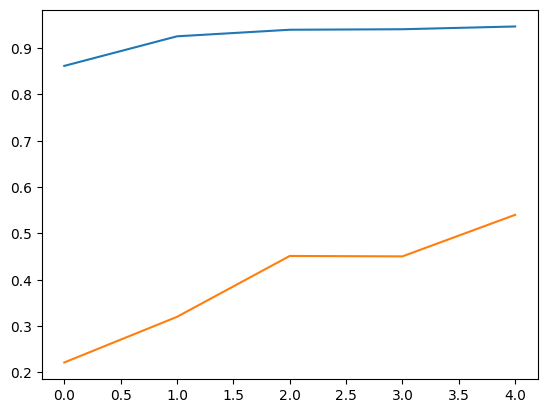

In [20]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.figure(1)
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")

    plt.figure(2)
    plt.plot(hist.history["f1_score"])
    plt.show()


plot_hist(hist)

TAKING UNSEEN SOYABEAN LEAF IMAGE


In [21]:
import cv2
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/download (13).jpeg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

error: ignored

In [22]:
preds=model.predict(x)
preds     # probabilities for being in each of the 2 classes

NameError: ignored

It predicts diseased leaf, which is correct.

## Inception V3


In [24]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

from tensorflow.keras import layers


NUM_CLASSES = 2
IMG_SIZE = 299
size = (IMG_SIZE, IMG_SIZE)


inputs1 = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs1 = InceptionV3(include_top=True, weights=None, classes=NUM_CLASSES)(inputs1)


In [25]:
im_size = 299

images1 = []
labels1 = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images1.append(img)
        labels1.append(i)

In [26]:
images1 = np.array(images1)

images1 = images1.astype('float32') / 255.0
images1.shape

(1194, 299, 299, 3)

In [27]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images1, Y = shuffle(images1, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images1, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1134, 299, 299, 3)
(1134, 2)
(60, 299, 299, 3)
(60, 2)


In [28]:
from keras import optimizers, losses, activations, models
model1 = tf.keras.Model(inputs1, outputs1)

model1.compile(optimizer=optimizers.SGD(lr=1e-4,
                                       momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy","F1Score"] )

model1.summary()

hist1 = model1.fit(train_x, train_y, epochs=5, verbose=2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 2)                 21806882  
                                                                 
Total params: 21806882 (83.19 MB)
Trainable params: 21772450 (83.06 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________
Epoch 1/5
36/36 - 46s - loss: 0.3418 - accuracy: 0.8748 - f1_score: 0.5801 - 46s/epoch - 1s/step
Epoch 2/5
36/36 - 16s - loss: 0.3118 - accuracy: 0.8818 - f1_score: 0.6655 - 16s/epoch - 441ms/step
Epoch 3/5
36/36 - 15s - loss: 0.2085 - accuracy: 0.8889 - f1_score: 0.6904 - 15s/epoch - 430ms/step
Epoch 4/5
36/36 - 15s - loss: 0.1673 - accuracy: 0.9277 - f1_score: 0.8207 - 15s/epoch - 427ms/step
Epoch 5/5
36

In [29]:
preds = model1.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2/2 [==============================] - 4s 2s/step - loss: 0.3243 - accuracy: 0.9000 - f1_score: 0.8330
Loss = 0.3242635726928711
Test Accuracy = 0.8999999761581421


In [30]:
hist1.history


{'loss': [0.3417806327342987,
  0.311807781457901,
  0.2085142582654953,
  0.16732613742351532,
  0.16329210996627808],
 'accuracy': [0.8747795224189758,
  0.8818342089653015,
  0.8888888955116272,
  0.9276896119117737,
  0.9171075820922852],
 'f1_score': [array([0.9318618 , 0.22826087], dtype=float32),
  array([0.93450636, 0.39639643], dtype=float32),
  array([0.93829584, 0.44247788], dtype=float32),
  array([0.959204  , 0.68217057], dtype=float32),
  array([0.953373 , 0.6269841], dtype=float32)]}

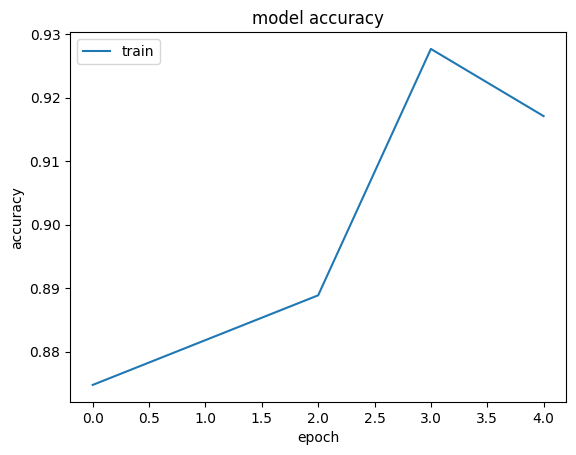

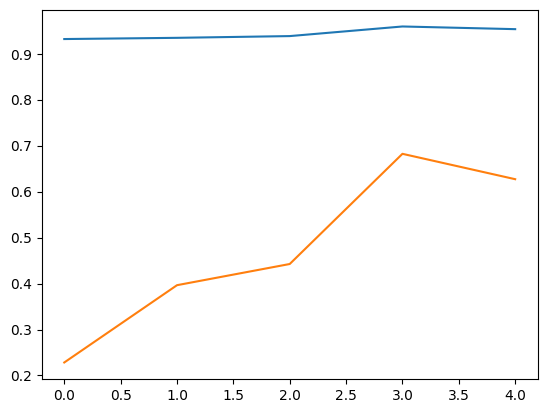

In [32]:
import matplotlib.pyplot as plt


def plot_hist(hist):

    plt.figure(1)
    plt.plot(hist.history["accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")

    plt.figure(2)
    plt.plot(hist.history["f1_score"])



    plt.show()


plot_hist(hist1)